# 02. Obtendo os clusters

In [33]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"
dataframe = pd.read_csv(url)
dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
# Como alguns atributos não são importantes para nós, fazemos a remoção.

dataframe.drop(columns=['CUST_ID', 'TENURE'], inplace=True)
dataframe

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000


In [35]:
# Procurando os dados faltantes.

missing = dataframe.isna().sum()
missing

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64

In [36]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
missing

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64

In [37]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
values




array([[3.93555441e-02, 7.87271593e-04, 9.17958473e-02, ...,
        1.94178127e-01, 1.34239194e-01, 0.00000000e+00],
       [2.93875903e-01, 8.34231560e-05, 0.00000000e+00, ...,
        3.76516684e-01, 9.84037959e-02, 2.03923046e-05],
       [3.10798149e-01, 1.24560965e-04, 9.63068011e-02, ...,
        7.74852335e-02, 7.81351982e-02, 0.00000000e+00],
       ...,
       [2.27733092e-02, 8.11060955e-04, 1.40540698e-01, ...,
        7.90986945e-02, 8.02156174e-02, 2.43318384e-04],
       [2.65257948e-02, 1.64255731e-03, 0.00000000e+00, ...,
        1.03579625e-01, 1.09898221e-01, 4.92767391e-04],
       [1.86406219e-01, 3.33426837e-04, 5.46778061e-01, ...,
        3.15915455e-02, 4.41568390e-02, 0.00000000e+00]])

In [38]:
from sklearn.cluster import KMeans

"""
O Kmeans é um algorítimo não-determinístico, isto é, a cada execução dele obteremos um resultado 
diferente. Então configurando o valor 10, dez vezes seguidas o caminho deve retornar o mesmo valor 
para garantir sua confiabilidade. Basicamente forçamos o algorítimo a ser executado dez vezes.
"""
kmeans = KMeans(n_clusters=5, n_init= 10, max_iter=300)
y_pred = kmeans.fit_predict(values)
y_pred

array([0, 1, 0, ..., 0, 0, 4])

# 03. Entendendo os critérios e métricas de validação

## Coeficiente de silhouette:

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/3_2_1_coeficiente.png)

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/3_2_2_grafico.png)

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/3_2_3_distancia.png)

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/3_2_4_novos+pontos.png)

![](https://i.imgur.com/u3NkwzG.png)

![](https://i.imgur.com/JtKiHwN.png)

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/3_2_5_formula.png)

![](https://i.imgur.com/ABzpvgw.png)



In [39]:
# Implementando o coeficiente de silhouette.

from sklearn.metrics import silhouette_score

labels = kmeans.labels_
silhouette = silhouette_score(values, labels, metric='euclidean')
silhouette


0.34852928204523576

# 04. Entendendo e Calculando o Índice Davies-Bouldin

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/4_1_1_formula.png)

"R" Evoca outra formula para ser calculado, e basicamente nos entrega uma medida de similaridade entre dois clusters, "i" e "j".

![](https://i.imgur.com/QfPVycz.png)

"s" é a similaridade dentro do cluster, isto é, compactação. Já o "d" reflete a similaridade entre clusters, a separação.

"s" será a distância média entre cada ponto do cluster e seu centroide. Calculamos a distância por meio da fórmula de silhouette na aula anterior, mas a diferença neste caso é que calcularemos a distância de um ponto até o centro do cluster.

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/4_1_3_centroide.png)

![](https://i.imgur.com/FA9BwbW.png)

![](https://i.imgur.com/DYuk7JP.png)

![](https://i.imgur.com/Em8R6SY.png)

*d* é a distância entre os centroides dos clusters.

![](https://i.imgur.com/uzvGw5T.png)

![](https://i.imgur.com/biz9T1s.png)

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/03/4_1_1_formula.png)

![](https://i.imgur.com/3OiiuU1.png)

![](https://i.imgur.com/qSsPwzR.png)

Quanto mais próximo de 0, melhor nosso resultado.



In [40]:
from sklearn import metrics

dbs = metrics.davies_bouldin_score(values, labels)
dbs

1.1527134855876944

# 05. Entendendo e calculando o Índice Calinski Harabasz 

Ele leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes.

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/05/5_1_1_sz.png)

O primeiro valor que temos é de Ne, isto é, número de elementos dentro do cluster. Temos três clusters e três elementos em cada um deles, logo 9 elementos no total.

![](https://i.imgur.com/1GfAXKJ.png)

K, é o número de klusters, então, 3.

![](https://i.imgur.com/1q6b0M5.png)

![](https://i.imgur.com/VCPpDbx.png)

![](https://i.imgur.com/QQPflev.png)

![](https://i.imgur.com/68k06NU.png)

![](https://i.imgur.com/SDMxJoy.png)

![](https://i.imgur.com/iIqwLjE.png)

![](https://i.imgur.com/ZUPfblT.png)

![](https://i.imgur.com/E7vHicL.png)

Não calcularemos os valores de covariância pois ela não será utilizada no cálculo, ela está aqui agora apenas para nos auxiliar a criar a matriz.

Faremos o mesmo procedimento para o cluster vermelho, mas dessa vez nomearemos os pontos como D, E e F. Coletaremos a matriz com o valor dos pontos, o centróide e então criaremos a matriz com as diferenças.


![](https://i.imgur.com/F5J2l8u.png)


E agora para o amarelo. 


A variância nada mais é que o valor da diferença entre o ponto e o centróide, ao quadrado. Como resultado para o cluster amarelo, teremos o valor 0,3. Agora que finalizamos a segunda parte da fórmula para todos os clusters, faremos a segunda, que é somar o resultado das três matrizes de variância e covariância.

![](https://caelum-online-public.s3.amazonaws.com/1384-cluster-analysis/05/5_2_2_soma.png)

Para realizar a soma corretamente, basta somarmos as cédulas que estão na mesma posição.

![](https://i.imgur.com/9YzvXF2.png)

Teremos a variância de 0,22 para x e 0,86 para y. Notemos que o valor de x é inferior ao valor de y. A ideia é que o valor de x seja o menor possível, em relação a variável x temos um cluster mais compacto, o que difere no caso y não apresenta a mesma compactação.

Podemos pensar que x seja o valor total de compras, então todos os clientes que estão dentro do cluster possuem um valor mais similar e conciso dentro do grupo, já y pode ser o débito que possuem dentro da empresa de cartão de crédito.

Temos o valor de Wk, agora precisamos do Tr de Wk. Tr é o traço, isto é, a soma de diagonais da matriz dos valores que obtemos. 0,22 + 0,86 = 1,08.

![](https://i.imgur.com/hMLRlZ7.png)

A próxima etapa é calcularmos o valor de Bk.

![](https://i.imgur.com/JynFWk8.png)

![](https://i.imgur.com/B8OAVqQ.png)

![](https://i.imgur.com/9qNhNGC.png)

![](https://i.imgur.com/iA7Z82z.png)

![](https://i.imgur.com/AlowIST.png)

E Faz-se esse processo para todos os centroides de cada clusters.


![](https://i.imgur.com/UCUQ3Lr.png)

![](https://i.imgur.com/6CSASTL.png)

![](https://i.imgur.com/OwxpHjG.png)


O resultado será 47,64. Esse é o valor final para nosso índice Calinski-Harabasz.

























# 06. Validando os clusters

In [41]:

calinsky = metrics.calinski_harabasz_score(values, labels)
calinsky

3422.8382083377455

In [42]:
print(f"Silhouette = {silhouette}")
print(f"dbs = {dbs}")
print(f"Calinsky = {calinsky}")

Silhouette = 0.34852928204523576
dbs = 1.1527134855876944
Calinsky = 3422.8382083377455


In [43]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init= 10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    
    dbs = metrics.davies_bouldin_score(dataset, labels)

    calinsky = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinsky

In [44]:
s1, dbs1, calinsky1 = clustering_algorithm(3, values)
print(s1, dbs1, calinsky1)



0.3272203126696238 1.309607364008843 3526.440519908274


In [45]:
s2, dbs2, calinsky2 = clustering_algorithm(5, values)
print(s2, dbs2, calinsky2)

0.36451198422831005 1.0754963863506781 3431.7947670502294


In [46]:
s3, dbs3, calinsky3 = clustering_algorithm(50, values)
print(s3, dbs3, calinsky3)

0.25115020089108236 1.2504597545927447 1609.7547248194032


In [47]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [48]:
# Comparadando com dados aleatórios. 

import numpy as np

random_data = np.random.rand(8950, 16)
s, dbs, calinsky = clustering_algorithm(5, random_data)
print(s, dbs, calinsky)
print(s2, dbs2, calinsky2)


0.040583197753028544 3.4483655216587343 307.9956677019827
0.36451198422831005 1.0754963863506781 3431.7947670502294


In [49]:
# Dividindo nosso array em 3:
set1, set2, set3 = np.array_split(values, 3)

s1, dbs1, calinsky1 = clustering_algorithm(5, set1)
s2, dbs2, calinsky2 = clustering_algorithm(5, set2)
s3, dbs3, calinsky3 = clustering_algorithm(5, set3)

print(s1, dbs1, calinsky1)
print(s2, dbs2, calinsky2)
print(s3, dbs3, calinsky3)


0.3689633507303375 1.056111437621245 1204.0955477128857
0.35416642754504835 1.1382306445993162 1194.951986504888
0.36704188760608253 1.098493261377676 1167.5309516804002


Termos valores parecidos nas três colunas e com as métricas diferentes, isso indica que nosso cluster é válido.

# 07. Visualizando os clusters

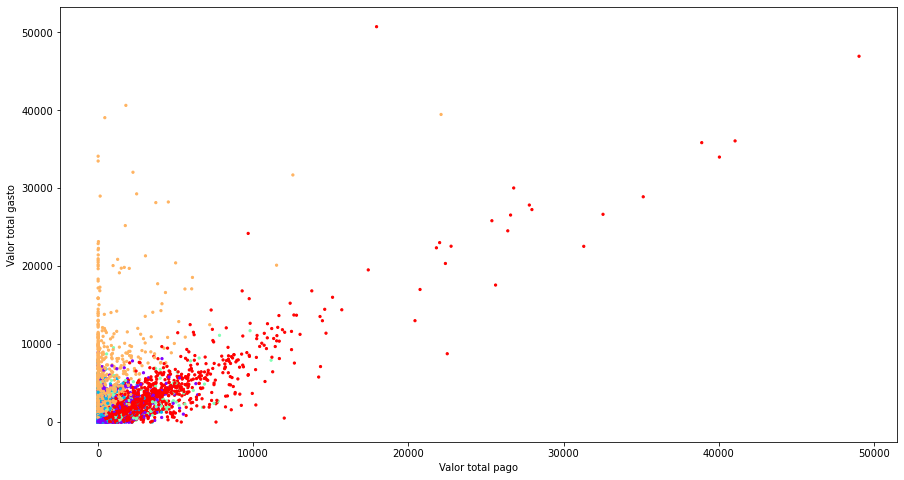

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Valor total pago')
plt.ylabel('Valor total gasto')
plt.show()




# 08. Entendendo os valores dos atributos no cluster

In [51]:
dataframe['cluster'] = labels
dataframe.groupby('cluster').describe()

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        3311.0   488.867396   936.898299    0.000000    24.007416   
1        1315.0  2719.616192  2230.337145    1.691842  1035.647960   
2        1825.0  2949.582558  2565.494710  114.523682  1216.893766   
3        1001.0  1748.854674  1987.975020    0.000000   486.170360   
4        1498.0  1117.171407  1625.342446    0.000000   211.969616   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          85.285023   448.965814   9630.367575            3311.0  0.780708   
1        2080.312991  3782.283750  12856.152510            1315.0  0.906890   
2        1843.308668  4021.881912  18495.558550            1825.0  0.996860   
3        1060.422892  2241.092286  14581.459140            1001.0  0.858535   
4         541.983437  1335.364048  19043.138560            1498.0  0.931526   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       260.172137   3933.230932           3311.0  0.244968   
1        ...      1164.174894   8644.138069           1315.0  0.007450   
2        ...      1961.161822  76406.207520           1825.0  0.001062   
3        ...       931.105425  21235.065300           1001.0  0.129974   
4        ...       530.447980  18621.013310           1498.0  0.282255   

                                                           
              std  min  25%       50%       75%       max  
cluster                                                    
0        0.345935  0.0  0.0  0.000000  0.436507  1.000000  
1        0.041141  0.0  0.0  0.000000  0.000000  0.600000  
2        0.013400  0.0  0.0  0.000000  0.000000  0.416667  
3        0.198876  0.0  0.0  0.083333  0.166667  1.000000  
4        0.369040  0.0  0.0  0.083333  0.567461  1.000000  

[5 rows x 128 columns]

# 09. Interpretando os clusters.

In [52]:
"""
Aprenderemos uma estratégia para selecionar o atributo mais significativo e analisá-lo. Nos basearemos nos centroides para tomar nossas decisões.
"""

centroids = kmeans.cluster_centers_
centroids

array([[7.41256976e-02, 2.30562257e-04, 1.22384952e-01, 4.90559177e-02,
        7.34297204e-02, 2.02256210e-02, 1.72049266e-04, 3.40191371e-05,
        1.39349370e-04, 7.57499670e-06, 1.18862126e-04, 2.86787207e-03,
        9.43224328e-01, 1.54777074e-01, 5.72195798e-02, 7.55204087e-05],
       [3.92225952e-01, 2.21961434e-04, 4.08966140e-02, 2.41375044e-02,
        1.67632013e-02, 4.69796685e-01, 4.57220814e-05, 1.60226742e-05,
        3.02199798e-05, 7.74424778e-05, 1.73808813e-03, 7.90301737e-04,
        7.16380049e-01, 1.49362355e-01, 1.32273009e-01, 2.04476303e-06],
       [5.34719561e-01, 3.07483975e-04, 9.40143076e-02, 4.50451970e-02,
        4.90841876e-02, 8.42618546e-02, 1.03569613e-04, 3.28730575e-05,
        7.70242320e-05, 3.86267235e-05, 6.70671828e-04, 2.24080860e-03,
        6.47510299e-01, 1.99941575e-01, 3.11248055e-01, 2.85575884e-07],
       [2.27283461e-01, 2.12919599e-04, 6.90552841e-02, 3.82103280e-02,
        3.08505405e-02, 3.64415621e-01, 5.84848743e-05, 2.247

In [53]:
centroids[:, 1]

array([0.00023056, 0.00022196, 0.00030748, 0.00021292, 0.00024557])

In [54]:
max = len(centroids[0])

centros = []
for i in range(max):
    print(dataframe.columns.values[i], "\n{:.4f}".format(centroids[:, i].var()), end='\n'*2)
    centros.append(centroids[:, i].var())

centros.sort(reverse=True)
centros[:5]

BALANCE 
0.0276

BALANCE_FREQUENCY 
0.0000

PURCHASES 
0.0218

ONEOFF_PURCHASES 
0.0077

INSTALLMENTS_PURCHASES 
0.0037

CASH_ADVANCE 
0.0351

PURCHASES_FREQUENCY 
0.0000

ONEOFF_PURCHASES_FREQUENCY 
0.0000

PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000

CASH_ADVANCE_FREQUENCY 
0.0000

CASH_ADVANCE_TRX 
0.0000

PURCHASES_TRX 
0.0000

CREDIT_LIMIT 
0.0210

PAYMENTS 
0.0348

MINIMUM_PAYMENTS 
0.0078

PRC_FULL_PAYMENT 
0.0000



[0.035070474536992115,
 0.03477665323056709,
 0.027629097280693505,
 0.02184679687297319,
 0.020951027047379552]

In [55]:
valores = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
description = dataframe.groupby('cluster')[valores]
n_clientes = description.size()
description = description.mean()
description['n_clients'] = n_clientes
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,488.867396,639.142794,126.249939,5180.291987,827.304607,3311
1,2719.616192,251.530144,3004.448265,4782.091255,1008.915227,1315
2,2949.582558,559.479945,573.495675,3730.000000,1050.324877,1825
3,1748.854674,531.250120,3064.439069,3914.956256,4961.223005,1001
4,1117.171407,3323.689626,185.514237,4043.598232,3045.848646,1498


CLUSTER 0: Clientes com os maiores valores em gastos. Péssimos pagadores. Boa quantidade de clientes.

CLUSTER 1: Clientes que gastam pouco. Clientes com maior limite. Bons pagadores. Maior número de clientes.

CLUSTER 2: Clientes que gastam muito com compras. Melhor pagador

CLUSTER 3: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

CLUSTER 4: Clientes que mais gastam e o foco deles é o saque. Pagam às vezes.

In [56]:
dataframe.groupby('cluster')['PRC_FULL_PAYMENT'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,3311.0,0.244968,0.345935,0.0,0.0,0.000000,0.436507,1.000000
1,1315.0,0.007450,0.041141,0.0,0.0,0.000000,0.000000,0.600000
2,1825.0,0.001062,0.013400,0.0,0.0,0.000000,0.000000,0.416667
3,1001.0,0.129974,0.198876,0.0,0.0,0.083333,0.166667,1.000000
4,1498.0,0.282255,0.369040,0.0,0.0,0.083333,0.567461,1.000000


![](https://i.imgur.com/ct9KbJH.png)

# TERMINA AQUI

In [57]:
len(labels)

8950

In [58]:
len(dataframe)

8950

In [83]:
url = "https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv"
dataframe_aux = pd.read_csv(url)  # lendo a url com o arquivo csv
cust_id = dataframe_aux['CUST_ID']  # Pegando somente a coluna CUST_ID
print(cust_id.head().to_markdown(numalign="center"))  # Mostrando o cust_id

|    | CUST_ID   |
|:--:|:----------|
| 0  | C10001    |
| 1  | C10002    |
| 2  | C10003    |
| 3  | C10004    |
| 4  | C10005    |


In [85]:
df_final = pd.DataFrame(data = {'CUST_ID': cust_id, 'cluster': labels})
print(df_final.head().to_markdown(numalign="center"))

|    | CUST_ID   |  cluster  |
|:--:|:----------|:---------:|
| 0  | C10001    |     0     |
| 1  | C10002    |     1     |
| 2  | C10003    |     0     |
| 3  | C10004    |     0     |
| 4  | C10005    |     2     |


In [77]:
final

,CUST_ID,cluster
0,C10001,0
1,C10002,1
2,C10003,0
3,C10004,0
4,C10005,2
...,...,...
8945,C19186,0
8946,C19187,0
8947,C19188,0
8948,C19189,0


In [67]:
dataframe.columns.values

array(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'cluster'], dtype=object)

In [69]:
dataframe_aux.columns.values - dataframe.columns.values

ValueError: operands could not be broadcast together with shapes (18,) (17,) 